
## `Groupby` en Pandas
La función `groupby` permite agrupar datos en función de una o varias columnas y realizar operaciones agregadas sobre cada grupo.
GROUP BY nos suena de SQL... ¿No?

### Sintaxis básica
```python
df.groupby('columna')
```
Donde:
- `df`: Es el DataFrame.
- `by`: Es la columna o lista de columnas para agrupar.


In [ ]:
### Ejemplo

import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


data = {'Categoria': ['A', 'B', 'A', 'B'], 'Valor': [10, 20, 30, 40]}
df = pd.DataFrame(data)
df



In [ ]:
# Agrupación por categoría y cálculo de la suma
resultado = df.groupby('Categoria')['Valor'].sum() 
print(resultado)


In [ ]:
#Entre paréntesis pongo por lo que agrupo
#Entre corchetes pongo qué es lo que quiero sumar, contar, etc, lo que en SQL poníamos entre AVG, SUM, COUNT...
#después ponemos la función de .sum(), .count(), .mean()...

In [ ]:
resultado2 = df.groupby('Categoria')['Valor'].mean()
print(resultado2)

In [ ]:
resultado3 = df.groupby('Categoria')['Valor'].count()
print(resultado3)

In [ ]:
resultado4 = df.groupby('Categoria')['Valor'].median()
print(resultado4)

In [ ]:
resultado5 = df.groupby('Categoria')['Valor'].min()
print(resultado5)

In [ ]:
resultado6 = df.groupby('Categoria')['Valor'].max()
print(resultado6)

In [ ]:
#cómo combinar varias funciones: con .agg()
resultado7 = df.groupby('Categoria')['Valor'].agg(['mean', 'sum', 'max', 'min'])
print(resultado7)

In [ ]:
resultado8 = df.groupby('Categoria').agg(media=('Valor', 'mean')).reset_index()
print(resultado8)

# Estadísticas con `groupby`


- `count()` – número de observaciones no nulas
- `describe()` - resumen de los principales estadísticos
- `sum()` – suma de todos los valores
- `mean()` – media de los valores
- `median()` – mediana de los valores
- `min()` – valor mínimo
- `max()` – valor máximo
- `std()` – desviación estándar
- `var()`– varianza


In [1]:
# Pasos: Importamos librerías
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [ ]:
# cargamos el dataframe creado en la lección anterior
df = pd.read_csv("bank-additional.csv", index_col = 0)
df.head()

## Vamos a contestar a las siguientes preguntas:
1. ¿Cuál es la edad media de los clientes en función de su educación?
2. ¿Son los clientes que aceptan el producto ofrecido en la campaña de marketing más jovenes?
3. ¿Hay diferencia entre la cantidad de gente que acepta nuestra propuesta o no y su estado civil?

1. ¿Cuál es la edad media de los clientes en función de su educación? Queremos la edad media por nivel educativo.
### Pasos:
- Grupo: educación
- Agregado: edad media
  - columna: age
  - función: mean()

In [ ]:
resultado = df.groupby('education')['age'].mean()
resultado

In [ ]:
resultado = df.groupby('education')['age'].mean().round()
resultado

In [ ]:
# ¿Qué ocurre con los NaN? ¿Son tenidos en cuenta?

# Crear un DataFrame con valores nulos
data = {'A': [10, 20, None, 30]}
df2 = pd.DataFrame(data)
df2

In [ ]:
# Calcular la media
media = df2['A'].mean()
print(media)
# Por defecto, los valores nulos no se tienen en cuenta

In [ ]:
# si nos fijamos, el resultado que nos devuelve es una Serie, pero a nosotros nos puede interesar tenerlo como un DataFrame. 
# para eso lo que tendremos que hacer es usar el método '.reset_index()' de Pandas y almacenarlo en una variable
resultado = df.groupby('education')['age'].mean().reset_index()
resultado

2. ¿Los clientes que aceptan el producto en la campaña de marketing son más jovenes que los que no?
   Queremos comparar la edad de los que aceptan con los que no aceptan. Calculamos la edad usando mean
### Receta:
- Grupo: y
- Agregado: edad media
  - columna: age
  - función: mean()

In [ ]:
df['y'].unique()

In [ ]:
# en este caso, podemos ver como no hay una gran diferencia entre las medias de las edades de nuestros clientes que han aceptado o no. 
resultado = df.groupby("y")["age"].mean().reset_index()
resultado

2. ¿Hay diferencia entre la cantidad de gente que acepta nuestra propuesta o no y su estado civil?
### Receta:
- Grupo: marital
- Agregado: id (quieren sumar gente, cuánta gente hay casada, soltera...)
  - columna: id
  - función: count()

In [ ]:
#Pero dentro de cada estado civil, queremos agrupar también por los que han dicho sí y los que han dicho no...
#married-yes
#married-no 
#single-yes  
#single-no

#entonces...


### Receta:
- Grupo: marital + y
- Agregado: número personas que aceptan/no aceptan
  - columna: id
  - función: count()

In [ ]:
# además ahora no queremos hacer una media si no que queremos contar el número de clientes que tenemos para cada combinación de categorías, 
# para eso lo que haremos será contar el número de id que tenemos
df.groupby(["marital", "y"])["id_"].count().reset_index()

### Ahora vamos a estudiar más en profundidad las diferencias de edad entre los distintos grupos educativos. Para ello, vamos a sacar diferentes estadísticos de edad.

### Receta:
- Grupo: education
- Agregado: edad media, mediana, variación standard, varianza, mínimo, máximo
  - columna: age
  - función: mean(), median(), std(), var(), min(), max()


### Vamos a ver qué significan estos estadísticos (se viene una teoría un poco densa, pero podemos!!!).

1. **Media**: La media es el promedio de un conjunto de datos. Se obtiene sumando todos los valores y luego dividiendo esa suma entre el número total de datos.


    Interpretación: Es una medida central que nos da una idea general del valor típico de edad en el grupo.


    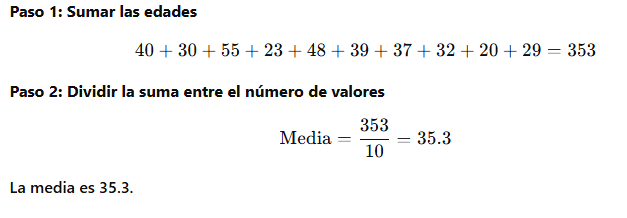


2. **Desviación estándar**: La desviación estándar es una medida de dispersión que nos indica cuánto se desvían los valores individuales del promedio (la media). Una desviación estándar alta indica que los valores están más dispersos, mientras que una desviación estándar baja indica que los valores están más cercanos a la media. ¿Cómo se calcula? Primero obtengo la media, después le resto a cada edad la media, elevo el resultado al cuadrado (para eliminar valores negativos), los sumo, hago la media de estos y a lo que me de, le hago la raíz cuadrada.

    Interpretación: Supongamos que la desviación estándar resulta ser 2.5. Esto significa que, en promedio, las edades de las alumnas están dispersas alrededor de 2.5 años de distancia de la media (26.4). Siendo una desviación estándar relativamente baja, podemos decir que las edades de las alumnas están relativamente cercanas al valor promedio. Para considerar si la desviación estándar es alta o baja hay que conocer los datos, es muy relativo.

    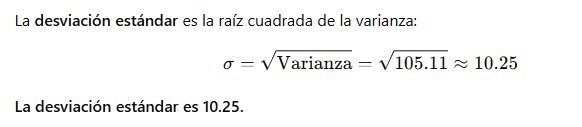

3. **Varianza**: La varianza es otra medida de dispersión que mide el grado en que los datos se alejan de la media. Se calcula como el promedio de los cuadrados de las diferencias entre cada valor y la media.¿Cómo se calcula? Primero obtengo la media, después le resto a cada edad la media, elevo el resultado al cuadrado (para eliminar valores negativos), los sumo y hago la media de estos.
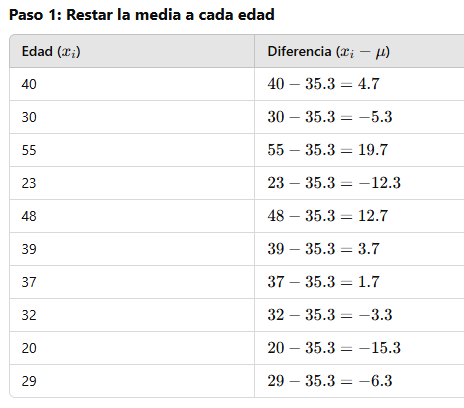
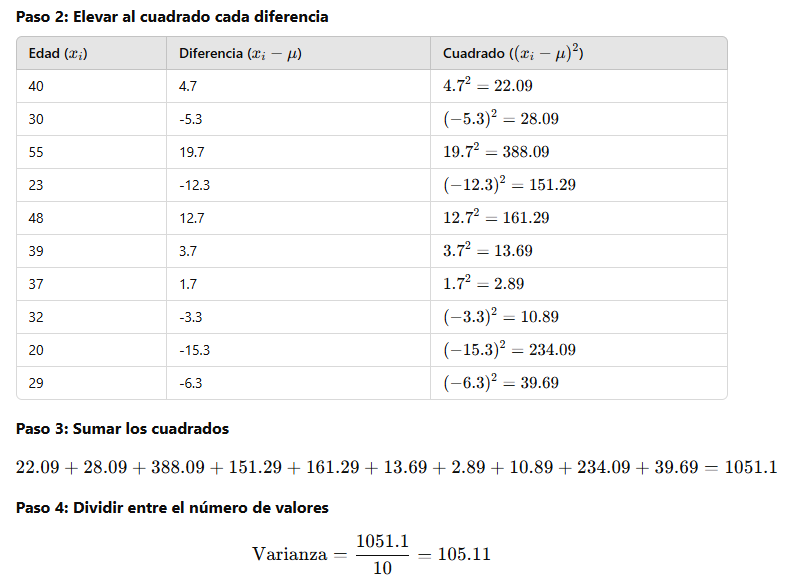

    Interpretación: Si suponemos que la varianza resulta ser 6.25, esto significa que, en promedio, las edades de las alumnas difieren aproximadamente 6.25 años cuadrados de la media (26.4). La varianza es útil para comprender la dispersión de los datos, pero puede ser difícil de interpretar directamente debido a que se expresan en unidades al cuadrado. ¡¡POR ESO!! Vamos a utilizar, en general, la desviación estándar para hacer comparaciones y la varianza solo será el paso para llegar a la desviación estándar.

4. **Mediana**: La mediana es el valor que se encuentra justo en el centro de un conjunto de datos ordenados. Divide al conjunto en dos partes iguales, donde la mitad de los datos están por encima y la otra mitad por debajo.

    Interpretación: Supongamos que la mediana tiene un valor de 82. Esto nos indica que la mitad de las alumnas obtuvo una nota por encima de 82 y la otra mitad por debajo de este valor. A veces es mucho más útil que la media, ya que la media es muy sensible a outliers o valores atípicos.
    
    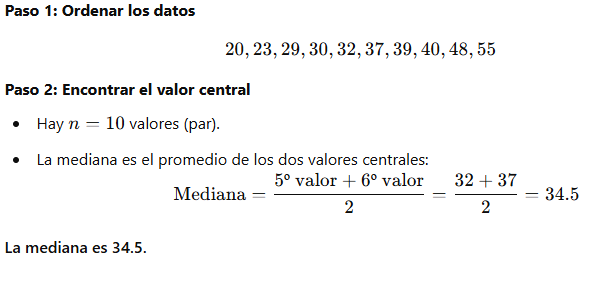

Estas medidas estadísticas son esenciales para resumir, describir y entender los datos en el contexto de la exploración y análisis de datos. Proporcionan una visión general de la distribución, la tendencia central y la dispersión de los datos, lo que permite tomar decisiones basadas en datos sólidos y obtener información valiosa para la toma de decisiones en diversas áreas como investigación, planificación empresarial, marketing, entre otros.

In [ ]:
#El método .agg() en Pandas se utiliza para aplicar múltiples funciones de agregación a los datos de un DataFrame#
resultado = df.groupby('education')["age"].agg(["mean", "median", "std", "var", "min", "max"])
resultado

## La interpretación de resultados es FUNDAMENTAL!!


**¿Qué conclusiones podemos sacar de nuestro groupby?**

- La mediana vemos que su valor es de 47 años para los clientes que tienen una educación *basic 4y*, esto significa que el 50 % de los clientes con este tipo de educación tienen una edad menor a 47 años y el otro 50% tienen una edad mayor que 47.  

- Por otro lado vemos que de media los clientes con una educación de *high school* son los más jovenes (media de 37.90). Por el contrario, clientes con una educación de *illiterate* y *basic 4y* tienen unas medias muy parecidas siendo los que tienen una media mayor de edad. 

- La varianza nos indica la dispersión de los datos en unidades al cuadrado, cosa que se puede hacer bastante complejo de interpretar, por eso tenemos la desviación que ya no esta expresada en unidades al cuadrado y es más fácil. Vamos a centrarnos en una sola de las categorías, en concreto en *basic 4y* que tiene una media de 47.60 y una desviación de 12.26, esto significa que cada cliente se desvía de media 12.26 años respecto al valor de la media (12.26). 

- Ahora nos puede surgir la duda de **¿cómo podemos saber si esa desviación es grande o pequeña?** Para debemos compararla con la media y tener en cuenta el contexto específico del problema. Aquí hay algunas pautas generales para interpretar la magnitud de la desviación estándar:

    - Comparación con la media:

        - Si la desviación estándar es mucho menor que la media, indica que los datos tienden a estar muy cerca del valor promedio. En otras palabras, los datos están más agrupados y tienen poca dispersión alrededor de la media. Esto se consideraría una desviación estándar pequeña.

        - Si la desviación estándar es aproximadamente igual a la media, sugiere que los datos tienen una dispersión moderada alrededor del promedio. En este caso, se consideraría una desviación estándar de tamaño medio.

        - Si la desviación estándar es considerablemente mayor que la media, significa que los datos tienen una dispersión significativa alrededor del promedio. Esto se consideraría una desviación estándar grande.

    - Escala de los datos:

        - La magnitud absoluta de la desviación estándar depende de la escala de los datos. Si los valores en el conjunto de datos tienen una escala grande, la desviación estándar también será grande en términos absolutos. Del mismo modo, si los datos tienen una escala pequeña, la desviación estándar será pequeña en términos absolutos.

        - Por lo tanto, es importante considerar la magnitud de los datos y no solo el valor numérico de la desviación estándar.




## ngroups

- Método 'ngroups': Indica el número de grupos distintos creados después de agrupar los datos utilizando la cláusula groupby. 
- NOTA: este método se tiene que aplicar sobre un objeto de tipo groupby y NO sobre un DataFrame o una Serie

In [ ]:
# recordamos el df
df.head(2)

In [16]:
# ¿Cuántos grupos de estado civil hay dependiendo o no de si han aceptado?

df.groupby(["marital", "y"])["id_"].count().reset_index()

,marital,y,id_
0,DIVORCED,no,4321
1,DIVORCED,yes,490
2,MARRIED,no,23344
3,MARRIED,yes,2655
4,SINGLE,no,10419
5,SINGLE,yes,1686


In [17]:
df.groupby(["marital", "y"]).ngroups

6